In [1]:
import networkx as nx
from alg_graphs.alg_graphs import pr, draw_nxgraph

#import matplotlib; matplotlib.use('Qt5Agg')
import graphblas as gb
from graphblas import Matrix, Vector, Scalar
from graphblas import unary, binary, monoid, semiring

import graphblas_algorithms as ga

import ipycytoscape as ics

%matplotlib inline

<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">From Magmas to Semirings</strong></div>

> A very large number of
path-finding problems in graphs, can be formulated and solved, in a unified
way, using appropriate algebraic structures called **Semirings**.

# 1. From Sets to Monoids

The basic structure we will study is a set with a binary operation.

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A **magma** consists of a set equipped with a single binary operation that must be closed by definition.<br>$\qquad$ No other properties are imposed.
</div>

Thus, a magma is a set $M$ with a binary operation $\bullet: M \times M \rightarrow M$:<br>
$\qquad$ For any two elements $a,b \in M \Rightarrow a \bullet b \in M$

We will denote a magma with $(M,\bullet)$, where $\bullet$ is a placeholder for the actual operation used.

We progressively endow the operation with additional properties:

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A **semigroup** is a magma $(M,\bullet)$ where $\bullet$ is associative.<br>
$\qquad$ For any $a,b,c \in M, \qquad (a\bullet b) \bullet c = a \bullet ( b \bullet c)$
</div>

**Examples of semigroups:**
* $(\mathbb{R}, min)$, and $(\mathbb{R}, max)$ the set of reals endowed with the operation **min** or **max** respectively<br>
The sets $(\mathbb{Z}, min), (\mathbb{N}, min), (\mathbb{R}, max), (\mathbb{Z}, max), (\mathbb{N}, max).$
* $\mathbb{R}_{+}\textbackslash{0}$ the set of strictly positive reals, endowed with addition or multiplication<br>
The same applies to $\mathbb{N}$, the set of strictly positive integers.
* $\mathbb{R}_{+}\textbackslash{0}$ with $a \bullet b = \frac{a+b}{1+a b}$

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A **monoid** $(M,\bullet,e)$ is a semigroup $(M,\bullet)$ with a two-sided neutral element $e$.<br>$\qquad$ For any $a \in M, \qquad a \bullet e = a$ and $e \bullet a = a$

**Definition:** A **monoid** $(M,\bullet,e)$ is **commutative** if for any $a,b \in M, \; a \bullet b = b \bullet a.$
</div>

**Examples of monoids:**
* $(\mathbb{R} \cup\{ -\infty \}, max, -\infty)$ and $(\mathbb{R} \cup\{ +\infty \}, min, +\infty)$ are commutative monoids.

**Remark:** the identity element is **unique,** since any two identity elements $e_1, e_2$ satisfy $e_1 = e_1 \bullet e_2 = e2$.

# 2. Ordered Monoids

<div style="background-color:#F2F5A9;color:black;">

**Definition:** Given a set $E$, a **preorder relation** denoted $\le$, is a binary relation featuring such that
* For all elements $a \in E$, $a \le a)$, (reflexivity)
* For any elements $a, b \in E$, $(a \le b \text{ and } b \le c) \Rightarrow a \le c), (transitivity)

**Definition:** Given a set $E$, an **order relation** denoted $\le$, is a binary relation featuring such that
* For all elements $a \in E$, $a \le a)$, (reflexivity)
* For any elements $a, b \in E$, $(a \le b \text{ and } b \le a) \Rightarrow a = b).$ (antisymmetry)
* For any elements $a, b \in E$, $(a \le b \text{ and } b \le c) \Rightarrow a \le c)$, (transitivity)

**Definition:** Let $E$ be an ordered set, that is to say a set endowed with an order relation $\le$.<br>
* Two elements $a,b \in E$ are said to be **non-comparable** if neither of the two
relations $a \le b$ and $b \le a$ are satisfied.
* If there exist non-comparable elements, we say that $E$ is a **partially ordered set**
or a **poset.**
* If there do not exist any non-comparable elements, we say that $E$ is a **totally ordered set**
</div>

**Example:**
* we can define a preorder relation induces by the $\oplus$ law of a monoid $(M,\oplus,e)$<br>
$a \le b \;\; \Leftrightarrow \;\; \exists c \in M \text{ such that }\; a \oplus c = b$

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A monoid $(M,\bullet,e)$ is **ordered** when we can define on $M$ an order relation
$\le$ compatible with the internal law $\bullet$ as follows:<br>
$\qquad$ For all $a, b, c \in E, \;\; a \le b \Rightarrow (a \bullet c) \le (b \bullet c)$
</div>

**Example**
* The monoid $(\mathbb{R}, +, 0)$ is ordered for the order relation "less than or
equal to" $\;(\le)$ on $\mathbb{R}$ (we have $a \le b \Rightarrow (a+c) \le (b+c)$.

# 3. Semirings

We now add a second operation:

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A **semi-ring** or **dioid** $(M,\bullet,\oplus,\mathbf{1},\mathbf{0}$ is a set $M$ with two binary relations $\bullet$ and $\oplus$, such that
* $(M,\oplus,\mathbf{0})$ is a **commutative monoid** (we will refer to the operation as "plus", and the neutral element as "zero")<br>
    * For any $a,b \in M, \qquad\quad a \oplus b = b \oplus a$
    * For any $a,b,c \in M, \qquad (a \oplus b) \oplus c = a \oplus ( b \oplus c)$
    * For any $a \in M, \qquad\qquad\mathbf{0} \oplus a = a$ and therefore $a \oplus \mathbf{0} = a$
* $(M,\bullet,\mathbf{1})$ is a **monoid** (we will refer to the operation as "multiplication", and the neutral element as "unity")<br>
    * For any $a,b,c \in M, \qquad (a \bullet b) \bullet c = a \bullet ( b \bullet c)$
    * For any $a \in M, \qquad\qquad\mathbf{1} \bullet a = a$ and $a \bullet \mathbf{1} = a$
* Multiplication is right and left distributive with regard to addition and has the 
zero element as an absorbing elemen:<br>
    * For any $a,b,c \in M, \qquad a\bullet ( b \oplus c ) = (a \bullet b) \oplus (a \bullet c)$
    * For any $a,b,c \in M, \qquad ( b \oplus c ) \bullet a = (b \bullet a) \oplus (c \bullet a)$
    * For any $a \in M\qquad\qquad a \bullet \mathbf{0} = \mathbf{0} \bullet a = \mathbf{0}$

</div>

**Examples of monoids:**
* $(\mathbb{R} \cup\{ +\infty \}, min, +, \infty, 0)$ and $(\mathbb{R} \cup\{ +\infty \}, min, +\infty)$ are commutative monoids.


# 4. Example with GraphBLAS

In [2]:
#!pip install --upgrade python-graphblas[default]
#!pip install --upgrade pandas
#!pip install --upgrade matplotlib
#!pip install --upgrade scipy
#!pip install --upgrade networkx
#!pip install --upgrade fast-matrix-market

* See [**the GraphBLAS primer**](https://python-graphblas.readthedocs.io/en/stable/getting_started/primer.html) for information about GraphBLAS
* See [**python-graphblas Gitlab Repository**](https://github.com/python-graphblas/python-graphblas) for further documentation
* See [**graphblas-algorithms**](https://github.com/python-graphblas/graphblas-algorithms) for higher level algorithm implementations

#### Scalars and Vectors

In [3]:
s = gb.Scalar.from_value(5)
pr( f"Scalar {s.value}, empty: {s.is_empty}, dimension {s.ndim}")
s

<strong style="font-size:20px;height:25px;color:blue;">Scalar 5, empty: False, dimension 0</strong>

"s_0"      value  dtype
gb.Scalar      5  INT64

In [4]:
v = gb.Vector.from_coo([0, 3, 5], [2.0, 3.1, 4.7])
idx, vals = v.to_coo()
pr( f"idx  = {idx}")
pr( f"vals = {vals}")
v

<strong style="font-size:20px;height:25px;color:blue;">idx  = [0 3 5]</strong>

<strong style="font-size:20px;height:25px;color:blue;">vals = [2.  3.1 4.7]</strong>

"v_0"      nvals  size  dtype  format
gb.Vector      3     6   FP64  bitmap
-------------------------------------
index    0 1 2    3 4    5
value  2.0      3.1    4.7

In [5]:
v.apply(lambda x: x % 3 - 2).new()

"v_1"      nvals  size  dtype  format
gb.Vector      3     6   FP64  bitmap
-------------------------------------
index    0 1 2    3 4    5
value  0.0     -1.9   -0.3

In [6]:
s.clear()
v.clear()

#### Adjacency Matrix

In [7]:
data = [
    [3, 0, 3, 5, 6, 0, 6, 1, 6, 2, 4, 1],  # source node
    [0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6],  # target node
    [3, 2, 3, 1, 5, 3, 7, 8, 3, 1, 7, 4],  # weight
]
# This is an adjacency matrix
# Reading along a row shows the out-nodes of a vertex
# Reading along a column shows the in-nodes of a vertex

rows, cols, weights = data
pr( f"Adjacency Matrix:")
m = Matrix.from_coo(rows, cols, weights)
m
# Size of the sparse matrix is 7x7 with 12 non-zero elements of type INT64

<strong style="font-size:20px;height:25px;color:blue;">Adjacency Matrix:</strong>

"M_0"      nvals  nrows  ncols  dtype   format
gb.Matrix     12      7      7  INT64  bitmapr
----------------------------------------------
   0  1  2  3  4  5  6
0     2     3         
1              8     4
2                 1   
3  3     3            
4                 7   
5        1            
6        5  7  3

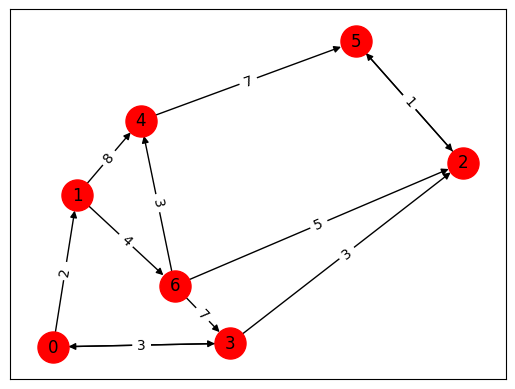

In [8]:
gb.viz.draw(m)

In [9]:
# Sum up all non-empty elements in M
total,m_max = m.reduce_scalar(gb.monoid.plus).value, m.reduce_scalar(gb.monoid.max).value
total, m_max

(47, 8)

In [10]:
# Sum up all non-empty elements in M
total,m_max = m.reduce_scalar(gb.monoid.plus).value, m.reduce_scalar(gb.monoid.max).value
total, m_max

(47, 8)

In [11]:
# Matrix multiplication
gb.semiring.min_plus(m @ m)

gb.MatrixExpression                        nrows  ncols  dtype
M_0.mxm(M_0, op=semiring.min_plus[INT64])      7      7  INT64

"Result"   nvals  nrows  ncols  dtype
gb.Matrix     17      7      7  INT64
-------------------------------------
    0  1   2   3   4   5  6
0   6      6      10      6
1          9  11   7  15   
2          2               
3      5       6       4   
4          8               
5                      2   
6  10     10           6   

Do expr.new() or other << expr to calculate the expression.

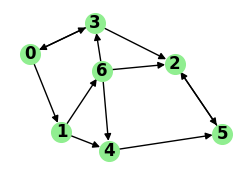

In [12]:
#Convert  gb graph to networkx graph
G = gb.io.to_networkx(m)
draw_nxgraph( gb.io.to_networkx(m), layout=nx.spring_layout, figsize=(3,2) )

In [13]:
#Convert   networkx  graph to gb graph
gb.io.from_networkx(G)

"M_3"      nvals  nrows  ncols  dtype  format
gb.Matrix     12      7      7  INT32     csr
---------------------------------------------
   0  1  2  3  4  5  6
0     2  3            
1           8  4      
2  3              3   
3                    7
4        7  3     5   
5                    1
6                 1

# 5. Example with Graphblas Algorithms

## 5.1 Use Graphblas Algorithms Directly

In [14]:
M = gb.Matrix.from_coo(
  [0,   0,    1,   2,   2,   3 ],     # source node
  [1,   3,    0,   0,   1,   2 ],     # target node
  [1.,  2.,   3.,  4.,  5.,  6.],     # weights
  nrows=4, ncols=4, dtype='float32'
)
G = ga.Graph(M)

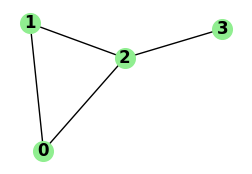

In [15]:
draw_nxgraph(G.to_networkx(), layout=nx.spring_layout, figsize=(3,2) )

In [16]:
ga.hits(G)

("hits_h"   nvals  size  dtype  format
 gb.Vector      4     4   FP64    full
 -------------------------------------
 index         0         1         2    3
 value  0.084935  0.226148  0.688917  0.0,
 "hits_a"   nvals  size  dtype  format
 gb.Vector      4     4   FP64    full
 -------------------------------------
 index         0         1    2         3
 value  0.481406  0.494781  0.0  0.023813)

## 5.2 Visualize with PyCytoscape

[PyCytoscape Example Notebooks](https://notebooks.gesis.org/binder/jupyter/user/quantstack-ipycytoscape-ln8hh1zj/tree/examples)

In [17]:
cscape = ics.CytoscapeWidget()
cscape.set_style([{ 'selector': 'node',  'style': {  'content': 'data(id)', 'font-family': 'helvetica', 'font-size': '20px',
                                                    "height":30, "width":30, "background-color":"lightgreen",
                                                  "text-valign": "center", "text-halign": "center"} ,
                                         'css': { 'content': 'data(id)', 'text-valign': 'center', 'color': 'white',
                                                  'text-outline-width': 2, 'text-outline-color': 'black', 'background-color': 'black' }
                  },
                  { "selector": "edge",  "style":{  'label': 'data(weight)',  "curve-style":"haystack",  "haystack-radius":0,  "width":0.3, "opacity":0.9,  "line-color":"black"  },
                  },
                  {'selector': 'edge.directed',  'style': {  'label': 'data(weight)',  'curve-style': 'bezier', 'target-arrow-shape': 'triangle',  'target-arrow-color': 'black'}
                  },
                ])

cscape.graph.add_graph_from_networkx( G.to_networkx(), directed=True)
cscape.set_layout(name='dagre')
#pn.pane.IPyWidget(cscape)
cscape

CytoscapeWidget(cytoscape_layout={'name': 'dagre'}, cytoscape_style=[{'selector': 'node', 'style': {'content':…

## 5.3 Use Graphblas Algorithms with NetworkX

In [18]:
G    = nx.erdos_renyi_graph(5000, 0.08) # Generate a random graph (5000 nodes, 1_000_000 edges) with NetworkX
G2   = ga.Graph.from_networkx(G)        # Explicitly convert to ga.Graph
T5   = nx.k_truss(G2, 5)                # Pass ga.Graph G2 to NetworkX's k_truss to produce a ga Graph
T5nx = T5.to_networkx()                 # convert the ga Graph to NetworkX

In [19]:
pr(f"this graph is too big to draw with NetworkX: Number of nodes and edges:  {(T5nx.number_of_nodes(), T5nx.number_of_edges())}") #, T5nx.is_directed()")

<strong style="font-size:20px;height:25px;color:blue;">this graph is too big to draw with NetworkX: Number of nodes and edges:  (5000, 998794)</strong>

In [20]:
#nx.write_gexf(T5nx, "foo.gexf")
#!rm foo.gexf

In [21]:
#pn.pane.IPyWidget(cscape) #.servable()